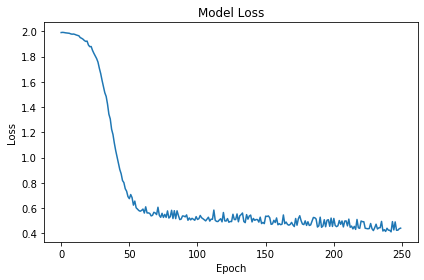

In [7]:
# Laura Guo
# 28 June 2020
# This is a single layer neural network using the iris dataset; made without Keras/Tensor flow.

import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sigmoid = np.vectorize(lambda x: 1 / (1 + np.exp(-x)))

# Derivative of sigmoid activation function
def d_sigmoid(x):
	return sigmoid(x) * (1 - sigmoid(x))
	
# Loss function (mean squared error)
def loss(output, target):
	return (1 / target.shape[0]) * np.sum((output - target) ** 2)

# Loading iris dataset
data = np.array(pandas.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=",", header=None))
np.random.shuffle(data)

X = data[0:50,0:4]
labels = data[:,4]
lr = 0.01
epochs = 250
batch_size = 32

# Convert dataset target outputs to one-hot encoding
Y = np.zeros((len(data), 3))

for i in range(len(data)):
	if data[i, 4] == "Iris-setosa":
		Y[i] = np.array([[1, 0, 0]])
	elif data[i, 4] == "Iris-versicolor":
		Y[i] = np.array([[0, 1, 0]])
	elif data[i, 4] == "Iris-virginica":
		Y[i] = np.array([[0, 0, 1]])
		
weights = np.random.rand(X.shape[1], Y.shape[1])
bias = np.zeros(Y.shape[1])
output = np.zeros(Y.shape[1]) # what the neural network thinks the answer is

# Training
loss_history = np.zeros(epochs)

for epoch in range(epochs):
	input_index = np.random.randint(0, len(X) - batch_size) # random example to train with
	input = np.reshape(X[input_index:input_index + batch_size, :], (batch_size, len(X[0])))
	target = np.reshape(Y[input_index:input_index + batch_size, :], (batch_size, len(Y[0])))
	
	# feedforward
	output = sigmoid(np.dot(input, weights) + bias)
	
	# backpropagation
	current_loss = loss(output, target)

	# weight updates
	deltas = 2 * (1/target.shape[0]) * (output - target) * d_sigmoid(output)
	updates = -lr * np.dot(input.T, deltas)
	weights = updates + weights
	
	# output bias updates
	output_bias_updates = -lr * np.sum(deltas, 0) / target.shape[0]
	bias += output_bias_updates
	
	loss_history[epoch] = current_loss
	#print("Epoch ", epoch, "\tLoss: ", current_loss, "\nOutput:\n", output, "\nTarget:\n", target)

# Accuracy/Loss Visualization
plt.plot(range(epochs), loss_history)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()
